# ObsID : 0945020132, SRCNUM : 7, Instru : EPN
**Simbad :** Quasar COMBO J0333017-275819 (https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%40651085&Name=COMBO%20J0333017-275819&submit=submit)

## ESASky
On ESASky, we observe optically that there are 2 very close sources, a blue one on which the EPIC cursor is placed and a yellow one (https://sky.esa.int/esasky/?target=53.2575%20-27.971638888888886&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr).

**Source bleue :** (most likely source)

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033301.7-275819
- IAU name : 4XMM J033301.6-275818
- RA : 03h 33m 01.706s
- DEC : -27° 58' 19.02"
- Flux : 7.916E-14 ergs/cm^2/s

``GAIA``
- Designation : Gaia DR3 5057482939190327168
- RA : 03h 33m 01.709s
- DEC : -27° 58' 18.91"
- Parallax : 2.4442 mas
- G (mag) : 20.5353

**Source jaune :** (source la moins probable)

``GLADE``
- Numero : 1 689 423
- RA : 03h 33m 01.008s
- DEC : -27° 58' 08.72"
- DLC : 5124.4652 Mpc

``2MASS``
- Name : 03330155-2758115
- RA : 03h 33m 01.555s
- DEC : -27° 58' 11.52"

``GAIA``
- Designation : Gaia DR3 5057482943486276480
- RA : 03h 33m 01.560s
- DEC : -27° 58' 11.49"
- Parallax : 1.469 mas
- Magnitude G (mag) : 16.1475

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

### Redshift

In [2]:
def redshift(d_Mpc):
    H0 = 70 # Hubble constant (km/s/Mpc)
    c = 299792.458 # km/s
    return H0*d_Mpc/c

z = redshift(5124.4652)
print("Redshift : z =", z)

Redshift : z = 1.196536318468692


## Fit statistic

In [5]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [6]:
AllData.clear()
spec = Spectrum(glob.glob("P*PNS*SRSPEC*.FTZ")[0])


1 spectrum  in use
 
Spectral Data File: P0945020132PNS003SRSPEC0007.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.461e-02 +/- 1.885e-03 (53.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-10
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 7890 sec
 Using fit statistic: chi
 Using Background File                P0945020132PNS003BGSPEC0007.FTZ
  Background Exposure Time: 7890 sec
 Using Response (RMF) File            epn_e3_ff20_sdY3.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0945020132PNS003SRCARF0007.FTZ



In [5]:
n_cts = 1.461e-02*7890

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 115.27289999999999


## Plot spectrum

In [7]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.2 12.0-**")

      No channels ignored (no channels in specified range)
     1 channels (10) ignored in spectrum #     1



(-0.5, 859.5, 660.5, -0.5)

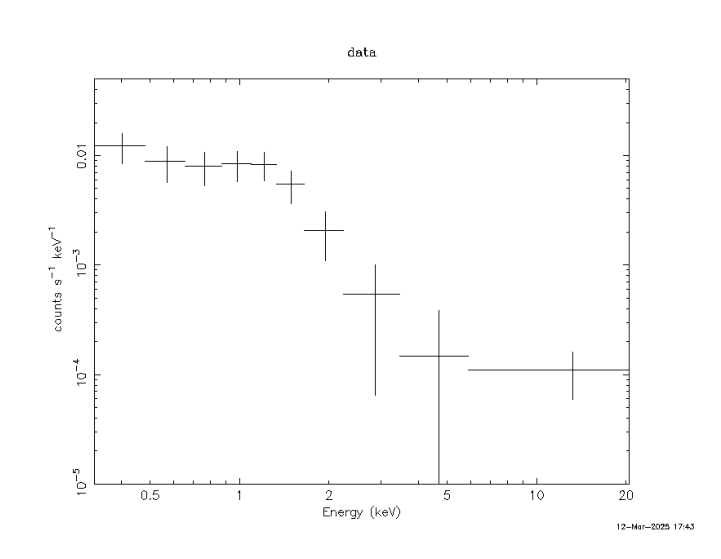

In [5]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum.png")[0])
plt.imshow(img)
plt.axis('off')

### Black body model
**tbabs :**

In [8]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              9.965947e+11     using 9 bins.

Tes

(-0.5, 859.5, 665.5, -0.5)

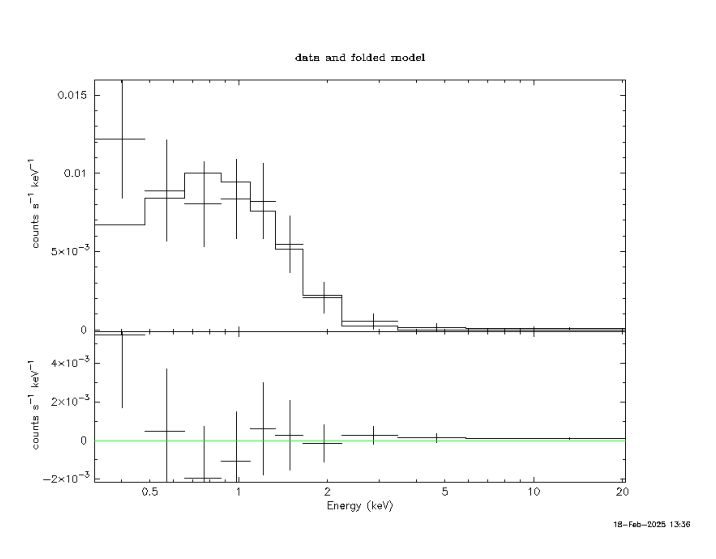

In [5]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbody.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [9]:
AllModels.clear()
moz = Model("ztbabs*bbody")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody_z = moz.zTBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model zTBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bbody      kT         keV      3.00000      +/-  0.0          
   4    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              9.963817e+11     using 9 bins.

Test statistic : Chi-Squared              9.963817e+11     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.149657e+12     using 9 bins.

Test statistic : Chi-Squared              1.149657e+12     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
              

### Bremsstrahlung model (Best fit)
**tbabs :**

In [10]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.343943e+10     using 9 bins.

Test statistic : Chi-Squared              3.343943e+10     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
48.018       2.30273      -2      0.414603       26.9144   9.46822e-06
40.5364      210047       -1     0.0180190       6.26848   4.19548e-06
11.947       835044       -2     0.0746589       1.42395   1.85592e-05
2.2

(-0.5, 861.5, 661.5, -0.5)

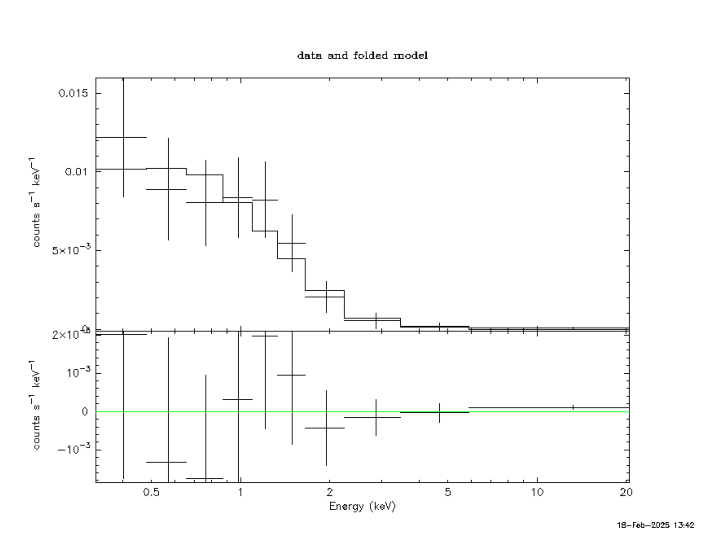

In [7]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremss.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [11]:
AllModels.clear()
moz = Model("ztbabs*bremss")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss_z = moz.zTBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model zTBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bremss     kT         keV      7.00000      +/-  0.0          
   4    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.334062e+10     using 9 bins.

Test statistic : Chi-Squared              3.334062e+10     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              9.790903e+10     using 9 bins.

Test statistic : Chi-Squared              9.790903e+10     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
             

### Apec model (Best ztbabs fit)
**tbabs :**

In [13]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.176106e+09     using 9 bins.

Test statistic : Chi-Squared              5.176106e+09     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
23.3401      2.45811      -1       1.07505      0.647373   0.000104858
20.4344      32783.3 

(-0.5, 862.5, 662.5, -0.5)

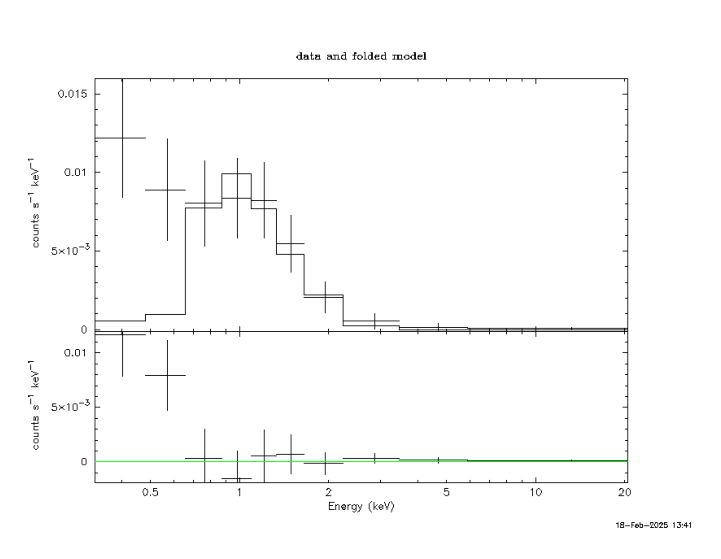

In [9]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apec.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [14]:
AllModels.clear()
moz = Model("ztbabs*apec")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec_z = moz.zTBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model zTBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   apec       kT         keV      1.00000      +/-  0.0          
   4    2   apec       Abundanc            1.00000      frozen
   5    2   apec       Redshift            0.0          frozen
   6    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.014496e+09     using 9 bins.

Test statistic : Chi-Squared              5.014496e+09     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              2.653470e+11     using 9 bins.

Test statistic : Chi-Squared              2.653470e+11     using 9 bin

(-0.5, 861.5, 659.5, -0.5)

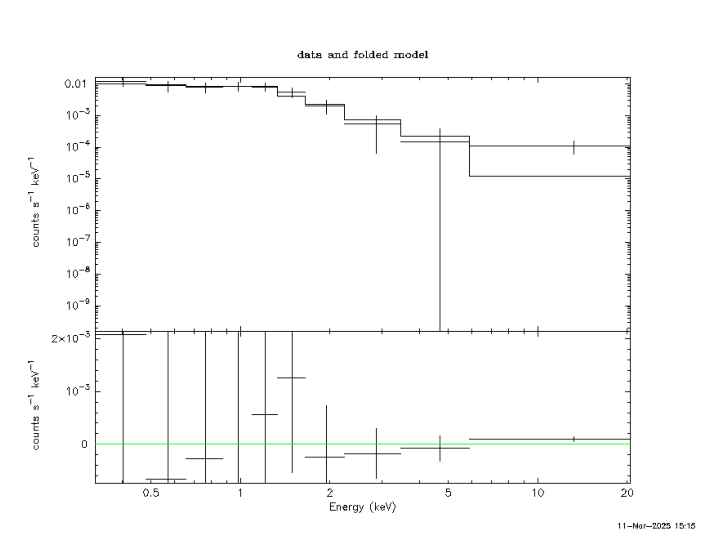

In [27]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apec_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model
**tbabs :**

In [15]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.233774e+11     using 9 bins.

Test statistic : Chi-Squared              2.233774e+11     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
46.7234      1.88599       0      0.367349       1.22879   5.54080e-06
24.696       356549       -1     0.0409373       1.75302   6.15735e-06
7.30299      795267       -2      0.181996       2.92212   1.82120e-05
3

(-0.5, 861.5, 662.5, -0.5)

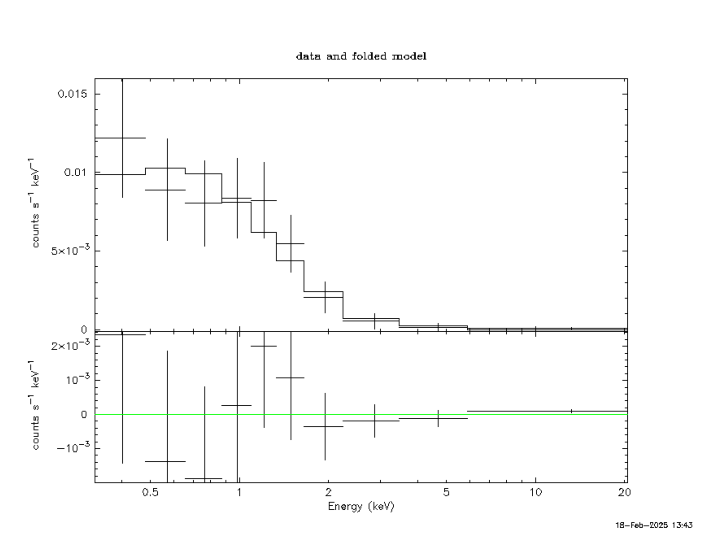

In [11]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_powerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [16]:
AllModels.clear()
moz = Model("ztbabs*powerlaw")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw_z = moz.zTBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model zTBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   4    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.230835e+11     using 9 bins.

Test statistic : Chi-Squared              2.230835e+11     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              3.947103e+11     using 9 bins.

Test statistic : Chi-Squared              3.947103e+11     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
           

### Black body + Powerlaw model
**tbabs :**

In [17]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.097826e+12     using 9 bins.

Test statistic : Chi-Squared              2.097826e+12     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
52.593       132513     

(-0.5, 856.5, 661.5, -0.5)

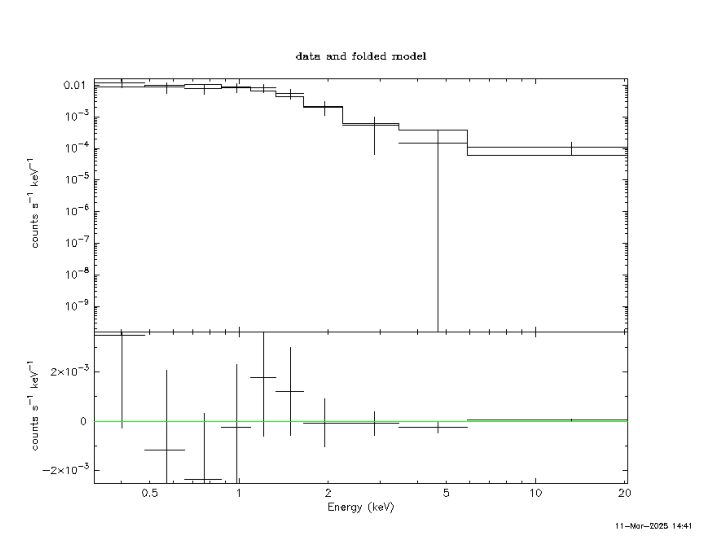

In [7]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbodypowerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [18]:
AllModels.clear()
moz = Model("ztbabs*(bbody+powerlaw)")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw_z = moz.zTBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model zTBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bbody      kT         keV      3.00000      +/-  0.0          
   4    2   bbody      norm                1.00000      +/-  0.0          
   5    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   6    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.096879e+12     using 9 bins.

Test statistic : Chi-Squared              2.096879e+12     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              2.676895e+12     using 9 bins.

Test statistic : Chi-Squared  

### Bremss + Powerlaw model
**tbabs :**

In [19]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.225664e+11     using 9 bins.

Test statistic : Chi-Squared              4.225664e+11     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
53.8612      38088.6   

(-0.5, 856.5, 661.5, -0.5)

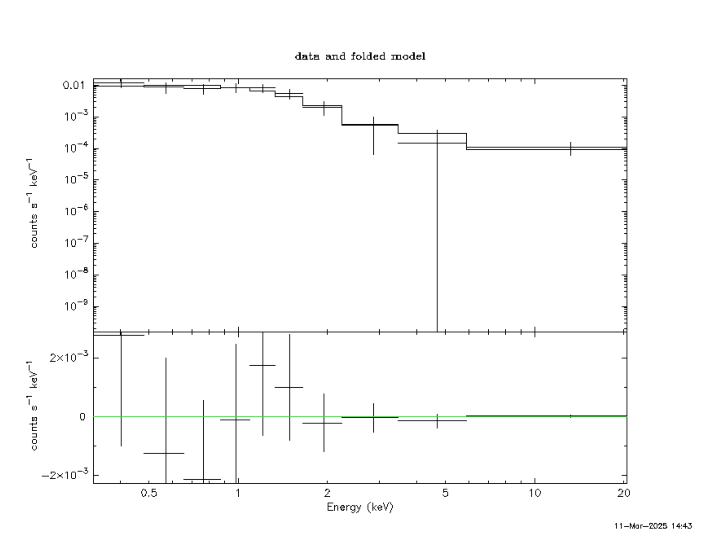

In [9]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremsspowerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [20]:
AllModels.clear()
moz = Model("ztbabs*(bremss+powerlaw)")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw_z = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model zTBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bremss     kT         keV      7.00000      +/-  0.0          
   4    2   bremss     norm                1.00000      +/-  0.0          
   5    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   6    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.218370e+11     using 9 bins.

Test statistic : Chi-Squared              4.218370e+11     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              8.632378e+11     using 9 bins.

Test statistic : Chi-Squared 

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 53.2571070°
- DEC = -27.9719507°

53.26 -27.97

**Column density :** nH = 3*10^20 cm^-2

In [22]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print(f"(ztbabs) : {nH_bbody_z*10**22}")
print()
print(color.BOLD+"bremss (Best fit)"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print(f"(ztbabs) : {nH_bremss_z*10**22}")
print()
print(color.BOLD+"apec (Best ztbabs fit)"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print(f"(ztbabs) : {nH_apec_z*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print(f"(ztbabs) : {nH_powerlaw_z*10**22}")
print()
print(color.BOLD+"bbody+powerlaw"+color.END)
print(f"(tbabs) : {nH_bbodypowerlaw*10**22}")
print(f"(ztbabs) : {nH_bbodypowerlaw_z*10**22}")

The different models give a column density of :

bbody
(tbabs) : 563340.3341978581
(ztbabs) : 1429418.4808889094

bremss (Best fit)
(tbabs) : 5.750904400506071e+20
(ztbabs) : 1.2665217596120202e+21

apec (Best ztbabs fit)
(tbabs) : 1.0188834778842866e+22
(ztbabs) : 6.4555119141561416e+16

powerlaw
(tbabs) : 1.5630508262041335e+21
(ztbabs) : 2.8336103263338417e+21

bbody+powerlaw
(tbabs) : 1.5638787619957834e+21
(ztbabs) : 2.832133912338269e+21


## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Bremss`` with Chi-squared = 2.0817 using 9 bins: **5.6136e-14 ergs/cm^2/s**.
- X-ray flux of the best-fitting ztbabs model ``Apec`` with Chi-squared = 1.1333 using 9 bins: **6.412e-14 ergs/cm^2/s**.

In [2]:
Flux_bremss = 5.6136e-14 # ergs/cm^2/s
Flux_apec = 6.412e-14 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Bremss : F_x-ray = {Flux_bremss} ergs/cm^2/s")
print(f"Apec : F_x-ray = {Flux_apec} ergs/cm^2/s")

X-ray flux : 
Bremss : F_x-ray = 5.6136e-14 ergs/cm^2/s
Apec : F_x-ray = 6.412e-14 ergs/cm^2/s


### Optical flux

In [3]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G_blue = 20.5353
G_yellow = 16.1475

Flux_blue = F_optical(G_blue)
Flux_yellow = F_optical(G_yellow)

print(color.BOLD+"Blue source (GAIA)"+color.END)
print(f"Optical flux : F_blue = {Flux_blue} ergs/cm^2/s")
print()
print(color.BOLD+"Yellow source (GAIA)"+color.END)
print(f"Optical flux : F_yellow = {Flux_yellow} ergs/cm^2/s")

Blue source (GAIA)
Optical flux : F_blue = 6.413119006406851e-14 ergs/cm^2/s

Yellow source (GAIA)
Optical flux : F_yellow = 3.649129695153657e-12 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [4]:
print(color.BOLD+"Blue source (GAIA)"+color.END)
print(f"Bremss : Ratio F_x-ray/F_blue = {Flux_bremss/Flux_blue} ergs/cm^2/s")
print(f"Apec : Ratio F_x-ray/F_blue = {Flux_apec/Flux_blue} ergs/cm^2/s")
print()
print(color.BOLD+"Yellow source (GAIA)"+color.END)
print(f"Bremss : Ratio F_x-ray/F_yellow = {Flux_bremss/Flux_yellow} ergs/cm^2/s")
print(f"Apec : Ratio F_x-ray/F_yellow = {Flux_apec/Flux_yellow} ergs/cm^2/s")

Blue source (GAIA)
Bremss : Ratio F_x-ray/F_blue = 0.8753307079428726 ergs/cm^2/s
Apec : Ratio F_x-ray/F_blue = 0.9998255129203538 ergs/cm^2/s

Yellow source (GAIA)
Bremss : Ratio F_x-ray/F_yellow = 0.015383394039009686 ergs/cm^2/s
Apec : Ratio F_x-ray/F_yellow = 0.017571312985985837 ergs/cm^2/s


## Luminosity

In [5]:
"""GAIA"""

P_mas = 2.4442 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L_bremss = 4*np.pi*Flux_bremss*(d_cm)**2 # erg/s
L_apec = 4*np.pi*Flux_apec*(d_cm)**2 # erg/s

print(color.BOLD+"Source bleue (GAIA)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(f"Bremss : L_x-ray = {L_bremss} erg/s")
print(f"Apec : L_x-ray = {L_apec} erg/s")
print()

"""GAIA"""

P_mas = 1.469 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L_bremss = 4*np.pi*Flux_bremss*(d_cm)**2 # erg/s
L_apec = 4*np.pi*Flux_apec*(d_cm)**2 # erg/s

print(color.BOLD+"Source jaune (GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Bremss : L_x-ray = {L_bremss} erg/s")
print(f"Apec : L_x-ray = {L_apec} erg/s")
print()

"""GLADE"""

d_kpc = 5124465.2 # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L_bremss = 4*np.pi*Flux_bremss*(d_cm)**2 # erg/s
L_apec = 4*np.pi*Flux_apec*(d_cm)**2 # erg/s

print(color.BOLD+"Source jaune (GLADE)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Bremss : L_x-ray = {L_bremss} erg/s")
print(f"Apec : L_x-ray = {L_apec} erg/s")

Source bleue (GAIA)
Distance : d = 1.2624580639882173e+21 cm
Bremss : L_x-ray = 1.1243078657528162e+30 erg/s
Apec : L_x-ray = 1.28421370158313e+30 erg/s

Source jaune (GAIA)
Distance : 2.1005445881552078e+21 cm
Bremss : L_x-ray = 3.112541401977694e+30 erg/s
Apec : L_x-ray = 3.555225785499674e+30 erg/s

Source jaune (GLADE)
Distance : 1.581256226764e+28 cm
Bremss : L_x-ray = 1.7638263446416293e+44 erg/s
Apec : L_x-ray = 2.014688350050258e+44 erg/s
